# FEC Sprint 1

### Michael Lamoureux. October 17, 2020. In JupyterCon 2020.

This is a first try at creating a data analysis of some FEC data. Working with David Lippert.



We are grabbing data from the USA Federal Election Commission website: [FEC.gov](https://FEC.gov)
<img src="FEC_site.png" width=500>

## Version 1

Let's just grab information from recipients named Lamoureux. (Because, why not?)

This involved going to the FEC website, selecting some data about individual contributions, then downloading a CSV file onto my desktop. I used this CSV file to create a dataframe using the Pandas toolbox. 

In [1]:
import pandas as pd
import numpy as np
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 

In [2]:
init_notebook_mode(connected = True) 

In [4]:
cf.go_offline()

In [5]:
df = pd.read_csv('FEC_lam2.csv')

## A first look

Here is a quick look at the data in the files. 

In [6]:
df

committee_id                                     committee_name  \
0       C00162818  INTERNATIONAL BROTHERHOOD OF ELECTRICAL WORKER...   
1       C00162818  INTERNATIONAL BROTHERHOOD OF ELECTRICAL WORKER...   
2       C00162818  INTERNATIONAL BROTHERHOOD OF ELECTRICAL WORKER...   
3       C00162818  INTERNATIONAL BROTHERHOOD OF ELECTRICAL WORKER...   
4       C00162818  INTERNATIONAL BROTHERHOOD OF ELECTRICAL WORKER...   
...           ...                                                ...   
1261    C00042366                                               DSCC   
1262    C00000935                                               DCCC   
1263    C00284885     THE HOME DEPOT INC. POLITICAL ACTION COMMITTEE   
1264    C00284885     THE HOME DEPOT INC. POLITICAL ACTION COMMITTEE   
1265    C00162818  INTERNATIONAL BROTHERHOOD OF ELECTRICAL WORKER...   

      report_year report_type  image_number line_number        transaction_id  \
0            2019          YE  2.020012e+17        11AI  A4E5607E3B89F4355920   
1            2019          YE  2.020012e+17        11AI  A6F4559663EF04995918   
2            2019          YE  2.020012e+17        11AI  AFB64773C574D42A4AB0   
3            2019          YE  2.020012e+17        11AI  A75262C971C0E416EA40   
4            2019          YE  2.020012e+17        11AI  AEBE8BC8DE76D4AF7885   
...           ...         ...           ...         ...                   ...   
1261         2020          M9  2.020092e+17        11AI              14981635   
1262         2020          M9  2.020092e+17        11AI              31119338   
1263         2020         M10  2.020100e+17        11AI    20200901-6388-2-32   
1264         2020         M10  2.020100e+17        11AI   20200915-6371-18-56   
1265         2020          Q3  2.020101e+17        11AI  AAF3639B5C7A5407C8F4   

      file_number  committee_name.1 entity_type  ... filing_form  \
0         1370771               NaN         IND  ...         F3X   
1         1370771               NaN         IND  ...         F3X   
2         1370771               NaN         IND  ...         F3X   
3         1370771               NaN         IND  ...         F3X   
4         1370771               NaN         IND  ...         F3X   
...           ...               ...         ...  ...         ...   
1261      1439506               NaN         IND  ...         F3X   
1262      1439933               NaN         IND  ...         F3X   
1263      1442377               NaN         IND  ...         F3X   
1264      1442377               NaN         IND  ...         F3X   
1265      1444647               NaN         IND  ...         F3X   

           link_id is_individual memo_text two_year_transaction_period  \
0     4.011620e+18             t       NaN                        2020   
1     4.011620e+18             t       NaN                        2020   
2     4.011620e+18             t       NaN                        2020   
3     4.011620e+18             t       NaN                        2020   
4     4.011620e+18             t       NaN                        2020   
...            ...           ...       ...                         ...   
1261  4.091920e+18             t       NaN                        2020   
1262  4.092020e+18             t       NaN                        2020   
1263  4.100220e+18             t       NaN                        2020   
1264  4.100220e+18             t       NaN                        2020   
1265  4.100920e+18             t       NaN                        2020   

     schedule_type increased_limit        sub_id  \
0               SA             NaN  4.011720e+18   
1               SA             NaN  4.011720e+18   
2               SA             NaN  4.011720e+18   
3               SA             NaN  4.011720e+18   
4               SA             NaN  4.011720e+18   
...            ...             ...           ...   
1261            SA             NaN  4.100620e+18   
1262            SA             NaN  4.100720e

In [7]:
df.head()

committee_id                                     committee_name  \
0    C00162818  INTERNATIONAL BROTHERHOOD OF ELECTRICAL WORKER...   
1    C00162818  INTERNATIONAL BROTHERHOOD OF ELECTRICAL WORKER...   
2    C00162818  INTERNATIONAL BROTHERHOOD OF ELECTRICAL WORKER...   
3    C00162818  INTERNATIONAL BROTHERHOOD OF ELECTRICAL WORKER...   
4    C00162818  INTERNATIONAL BROTHERHOOD OF ELECTRICAL WORKER...   

   report_year report_type  image_number line_number        transaction_id  \
0         2019          YE  2.020012e+17        11AI  A4E5607E3B89F4355920   
1         2019          YE  2.020012e+17        11AI  A6F4559663EF04995918   
2         2019          YE  2.020012e+17        11AI  AFB64773C574D42A4AB0   
3         2019          YE  2.020012e+17        11AI  A75262C971C0E416EA40   
4         2019          YE  2.020012e+17        11AI  AEBE8BC8DE76D4AF7885   

   file_number  committee_name.1 entity_type  ... filing_form       link_id  \
0      1370771               NaN         IND  ...         F3X  4.011620e+18   
1      1370771               NaN         IND  ...         F3X  4.011620e+18   
2      1370771               NaN         IND  ...         F3X  4.011620e+18   
3      1370771               NaN         IND  ...         F3X  4.011620e+18   
4      1370771               NaN         IND  ...         F3X  4.011620e+18   

  is_individual memo_text two_year_transaction_period schedule_type  \
0             t       NaN                        2020            SA   
1             t       NaN                        2020            SA   
2             t       NaN                        2020            SA   
3             t       NaN                        2020            SA   
4             t       NaN                        2020            SA   

  increased_limit        sub_id  \
0             NaN  4.011720e+18   
1             NaN  4.011720e+18   
2             NaN  4.011720e+18   
3             NaN  4.011720e+18   
4             NaN  4.011720e+18   

                                             pdf_url  \
0  http://docquery.fec.gov/cgi-bin/fecimg/?202001...   
1  http://docquery.fec.gov/cgi-bin/fecimg/?202001...   
2  http://docquery.fec.gov/cgi-bin/fecimg/?202001...   
3  http://docquery.fec.gov/cgi-bin/fecimg/?202001...   
4  http://docquery.fec.gov/cgi-bin/fecimg/?202001...   

                                   line_number_label  
0  Contributions From Individuals/Persons Other T...  
1  Contributions From Individuals/Persons Other T...  
2  Contributions From Individuals/Persons Other T...  
3  Contributions From Individuals/Persons Other T...  
4  Contributions From Individuals/Persons Other T...  

[5 rows x 79 columns]

In [8]:
list(df.columns.values)


['committee_id',
 'committee_name',
 'report_year',
 'report_type',
 'image_number',
 'line_number',
 'transaction_id',
 'file_number',
 'committee_name.1',
 'entity_type',
 'entity_type_desc',
 'unused_contbr_id',
 'contributor_prefix',
 'contributor_name',
 'recipient_committee_type',
 'recipient_committee_org_type',
 'recipient_committee_designation',
 'contributor_first_name',
 'contributor_middle_name',
 'contributor_last_name',
 'contributor_suffix',
 'contributor_street_1',
 'contributor_street_2',
 'contributor_city',
 'contributor_state',
 'contributor_zip',
 'contributor_employer',
 'contributor_occupation',
 'contributor_id',
 'receipt_type',
 'receipt_type_desc',
 'receipt_type_full',
 'memo_code',
 'memo_code_full',
 'contribution_receipt_date',
 'contribution_receipt_amount',
 'contributor_aggregate_ytd',
 'candidate_id',
 'candidate_name',
 'candidate_first_name',
 'candidate_last_name',
 'candidate_middle_name',
 'candidate_prefix',
 'candidate_suffix',
 'candidate_offi

## A first plot

It is always fun to just plot the dataframe, even though these first plots are not very informative. 

In [9]:
df.iplot()

## Better plots

Let's look at the contribution amounts, in a histogram. We will see there are lots of small contributions, and very few big contributions. 

In [12]:
df['contribution_receipt_amount'].iplot(kind ='histogram')

## More plots

Well, what about aggrefate contributions. (Warning. Do individuals show up several times in this listing? Probably yes.+

In [41]:
df['contributor_aggregate_ytd'].iplot(kind ='histogram')

## Basic data analysis

I'm curious to do a little bit of data analysis. Maybe I can amalgamate the information by stata

In [42]:
# Let's make a data frame with just the state and the amount
df[['contributor_state','contribution_receipt_amount']]

contributor_state  contribution_receipt_amount
0                   PA                       212.85
1                   PA                       143.50
2                   PA                       229.59
3                   PA                       181.76
4                   PA                       172.20
...                ...                          ...
1261                MA                       500.00
1262                MA                       100.00
1263                MO                        19.04
1264                MO                        19.04
1265                PA                       401.79

[1266 rows x 2 columns]

In [43]:
df_bystate = df[['contributor_state','contribution_receipt_amount']].groupby('contributor_state').sum()

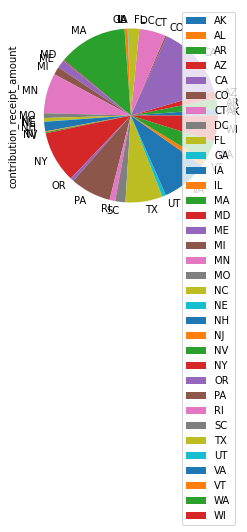

In [44]:
df_bystate.plot.pie(y='contribution_receipt_amount');

## Here is the by-state contibution, organizaed by amount.

In [38]:
df_bystate.sort_values(by='contribution_receipt_amount',ascending=False)

contribution_receipt_amount
contributor_state                             
CA                                     7207.20
MA                                     6752.89
NY                                     5050.90
VA                                     4555.39
PA                                     3978.49
MN                                     3925.00
TX                                     3627.90
CT                                     2591.82
WI                                     2540.30
WA                                     2049.76
FL                                     1100.50
SC                                     1000.00
AR                                     1000.00
NH                                      929.00
ME                                      804.38
MI                                      767.50
AZ                                      756.20
AK                                      630.00
VT                                      557.00
RI                                      553.40
MO                                      470.44
UT                                      371.25
NC                                      350.00
OR                                      339.10
IL                                      309.00
CO                                      156.40
NV                                      115.00
MD                                       85.00
NJ                                       79.00
GA                                       27.50
NE                                       20.00
IA                                       10.00
DC                                        5.50
AL                                        5.00

## Let's make a pie chart of the top ten state contributions. 

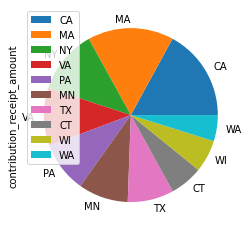

In [40]:
df_bystate.sort_values(by='contribution_receipt_amount',ascending=False)[0:10].plot.pie(y='contribution_receipt_amount');

## Can we use cufflinks to make a better pie chart?